In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [3]:
data = pd.read_csv("Treasury Squeeze raw score data.csv").drop(columns=["rowindex"])

# Preprocessing Data 

## Overview of Data

In [4]:
data.head()

,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [5]:
# All features are scaled
data.describe()

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.517025,0.507342,0.506971,0.504794,0.492294,0.469390,0.510498,0.503261,0.495017
std,0.411294,0.418360,0.414868,0.411697,0.414438,0.414856,0.413276,0.414060,0.417401
min,0.000039,0.000190,0.000220,0.000310,0.000188,0.000109,0.000197,0.000198,0.000161
25%,0.107899,0.092227,0.104720,0.108011,0.097522,0.086036,0.105793,0.101311,0.094566
50%,0.589354,0.570491,0.560740,0.561798,0.196330,0.186985,0.574814,0.560256,0.193544
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# seems all features are not highly linearly corelated.
# and response is not highly correlated to any of feature.
data.cov()

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
price_crossing,0.169163,-0.003306,-0.003287,-0.007675,0.001365,-0.004409,0.001592,-0.001045,0.005755,0.015296
price_distortion,-0.003306,0.175025,0.002395,0.000106,0.002618,-0.003931,-0.007034,-0.014959,0.000431,0.028177
roll_start,-0.003287,0.002395,0.172115,0.012383,-0.000777,0.001371,0.001531,-0.005615,-0.001902,-0.005735
roll_heart,-0.007675,0.000106,0.012383,0.169494,-0.003391,-0.001207,0.000242,-0.000269,0.001656,-0.006589
near_minus_next,0.001365,0.002618,-0.000777,-0.003391,0.171759,-0.005290,0.000352,-0.000557,0.011068,0.022683
ctd_last_first,-0.004409,-0.003931,0.001371,-0.001207,-0.005290,0.172106,-0.001085,-0.000170,-0.003068,0.023421
ctd1_percent,0.001592,-0.007034,0.001531,0.000242,0.000352,-0.001085,0.170797,-0.004971,-0.005265,-0.005540
delivery_cost,-0.001045,-0.014959,-0.005615,-0.000269,-0.000557,-0.000170,-0.004971,0.171446,-0.010727,0.006312
delivery_ratio,0.005755,0.000431,-0.001902,0.001656,0.011068,-0.003068,-0.005265,-0.010727,0.174224,0.051852
squeeze,0.015296,0.028177,-0.005735,-0.006589,0.022683,0.023421,-0.005540,0.006312,0.051852,0.244894


In [7]:
X = data.drop(columns=["squeeze"])
y = data["squeeze"]

In [8]:
# Two classes are balanced
np.sum(y == True) / len(y)

0.4266666666666667

## Plots of features

In [9]:
colors = {True: "red", False: "blue"}

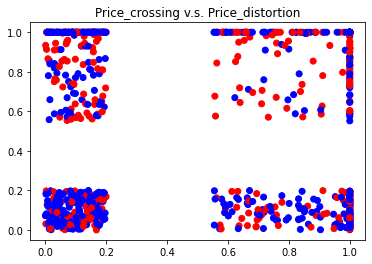

In [10]:
plt.scatter(X["price_crossing"], X["price_distortion"], c = y.map(colors))
plt.title("Price_crossing v.s. Price_distortion")
plt.show()

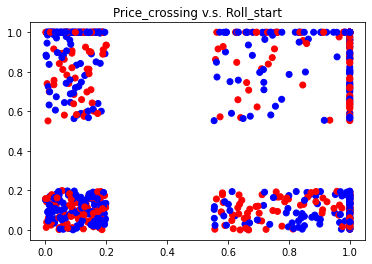

In [11]:
plt.scatter(X["price_crossing"], X["roll_start"], c = y.map(colors))
plt.title("Price_crossing v.s. Roll_start")
plt.show()

In [12]:
# From graph we can tell that it's impossible to separate response use only single feature

## Check linear separable

In [13]:
# Use PCA to reduce the dimensionality so that we could have a guess whether linear model could separat the response
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_model.fit(X.drop(columns='contract'))
pc = pca_model.transform(X.drop(columns='contract'))

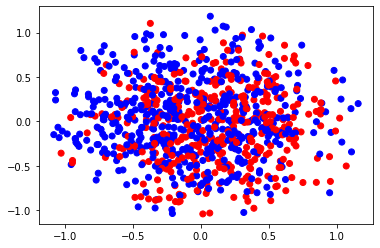

In [14]:
# From the plot we could tell that they are almost not linear separable
plt.scatter(pc[:, 0], pc[:, 1], c = y.map(colors))

## Non-Linear Features

In [15]:
# Some nonlinear patterns might not be captured
# number of capped feature (ones)
# number of features fall in different zones (there is a cutoff region)
# For each features, there is a clear cutoff in range of 0.2 to 0.5. 
# Features and response are not in linear relationship, probabiliy should use tree model.
# def addNonLinearFeature(X):   
#     X["ones"] = np.sum(X.drop(columns=["contract"]) == 1, axis = 1)
#     X["lower_count"] = np.sum(X.drop(columns=["contract", "ones"]) < 0.25, axis = 1)
#     return X

## Encoding categorical data

In [16]:
# Accucracy improved 2% after encoding contract
def encodingContract(data):
    data['contract_type'] = data['contract'].str[0:2]
    dummies = pd.get_dummies(data["contract_type"])
    
    data = pd.concat([data, dummies], axis = 1).drop(columns=["contract", "contract_type"])
    return data  

# Model Fitting 

In [17]:
# def fit_model(X, y, model):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
#     X_train = addNonLinearFeature(X_train)
#     X_train = encodingContract(X_train)
    
#     X_test = addNonLinearFeature(X_test)
#     X_test = encodingContract(X_test)
    
    
#     model.fit(X_train, y_train)
#     y_train_pred = model.predict(X_train)
    
#     # model.fit(X_test, y_test)
#     y_pred = model.predict(X_test)
    
#     metrics.plot_roc_curve(model, X_test, y_test)
#     plt.title("AUC Curve")
#     plt.show()
    
#     print("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
#     print("Testing accuracy: ", metrics.accuracy_score(y_test, y_pred))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train = encodingContract(X_train)
X_test = encodingContract(X_test)

In [19]:
# No need to standardize, features are in right scale
# Standardize the features
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [20]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train.map(colors))
# plt.title("Price_crossing v.s. Price_distortion")
# plt.show()

## SGD Classifier 

In [21]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
print(model.coef_)

[[ 0.85989845  0.52164611 -0.44152991  0.2881025   1.93232365  0.70575961
   0.39269925  0.53769039  2.51990306 -0.26702983  1.33514914  1.06811931
   0.53405965]]


In [22]:
print(model.intercept_)

[-4.00175234]


In [23]:
y_train_pred = model.predict(X_train)
print("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
y_pred = model.predict(X_test)
print("Testing accuracy: ", metrics.accuracy_score(y_test, y_pred))

Training accuracy:  0.6029629629629629
Testing accuracy:  0.5911111111111111


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [25]:
y_train_pred = model2.predict(X_train)
print("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
y_pred = model2.predict(X_test)
print("Testing accuracy: ", metrics.accuracy_score(y_test, y_pred))

Training accuracy:  1.0
Testing accuracy:  0.6577777777777778


In [26]:
# Training accuracy is significantly higher than testing

# Examine Overfitting

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# X_train = addNonLinearFeature(X_train)
# X_train = encodingContract(X_train)

## Search on n_estimators

In [28]:
from sklearn.model_selection import validation_curve
param_range = [10, 50, 75, 100, 125, 150, 200]
train_scores, test_scores = validation_curve(RandomForestClassifier(random_state=0)
                                             , X_train, y_train, param_name="n_estimators", param_range=param_range, cv=3)

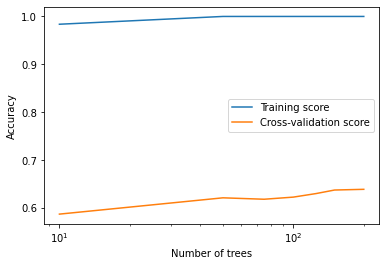

In [29]:
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.legend()
plt.xscale('log')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

In [30]:
model3 = RandomForestClassifier(random_state=0, n_estimators=125)
model3.fit(X_train, y_train)

y_train_pred = model3.predict(X_train)
print("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
y_pred = model3.predict(X_test)
print("Testing accuracy: ", metrics.accuracy_score(y_test, y_pred))

Training accuracy:  1.0
Testing accuracy:  0.6533333333333333


## Search on max_depth

In [31]:
depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(RandomForestClassifier(random_state=0, n_estimators=125)
                                             , X_train, y_train, param_name="max_depth", param_range=depth_range, cv=3)

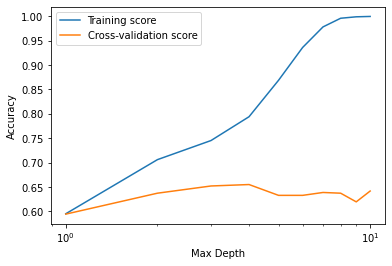

In [32]:
plt.plot(depth_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(depth_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.legend()
plt.xscale('log')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In [33]:
model4 = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=4)
model4.fit(X_train, y_train)

y_train_pred = model4.predict(X_train)
print("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
y_pred = model4.predict(X_test)
print("Testing accuracy: ", metrics.accuracy_score(y_test, y_pred))

Training accuracy:  0.7496296296296296
Testing accuracy:  0.64


In [34]:
# max depth should at most be 4 to prevent overfitting

# Model Comparisons

## Compare SGD Classifier with Random Forest

In [35]:
model

SGDClassifier(random_state=0)

In [36]:
model4

RandomForestClassifier(max_depth=4, random_state=0)

In [37]:
sgd_scores = []
rdf_scores = []
for i in range(100):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train = encodingContract(X_train)
    X_test = encodingContract(X_test)
    
    model.fit(X_train, y_train)
    sgd_pred = model.predict(X_test)
    
    model4.fit(X_train, y_train)
    rdf_pred = model4.predict(X_test)
    
    sgd_scores.append(metrics.accuracy_score(y_test, sgd_pred))
    rdf_scores.append(metrics.accuracy_score(y_test, rdf_pred))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


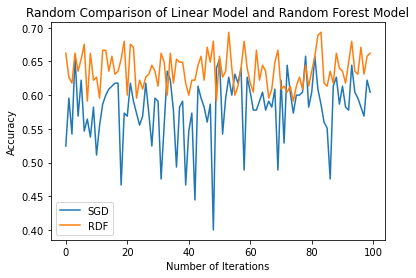

In [38]:
plt.plot(range(100), sgd_scores)
plt.plot(range(100), rdf_scores)
plt.title("Random Comparison of Linear Model and Random Forest Model")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.legend(["SGD", "RDF"])
plt.show()

In [39]:
print("Variance of SGD results:", np.var(sgd_scores))
print("Variance of RDF results:", np.var(rdf_scores))
print("Genearlly, the variance and bias performance of random forest model is better than SGD model.")

Variance of SGD results: 0.0022734143209876545
Variance of RDF results: 0.0006567407407407412
Genearlly, the variance and bias performance of random forest model is better than SGD model.


## Compare Random Forest before and after Justify Overfitting

In [45]:
rdf_default_scores = []
rdf_scores = []
default_model = RandomForestClassifier()
for i in range(300):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train = encodingContract(X_train)
    X_test = encodingContract(X_test)
    
    default_model.fit(X_train, y_train)
    rdf_default_pred = default_model.predict(X_test)
    
    model4.fit(X_train, y_train)
    rdf_pred = model4.predict(X_test)
    
    rdf_default_scores.append(metrics.accuracy_score(y_test, rdf_default_pred))
    rdf_scores.append(metrics.accuracy_score(y_test, rdf_pred))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

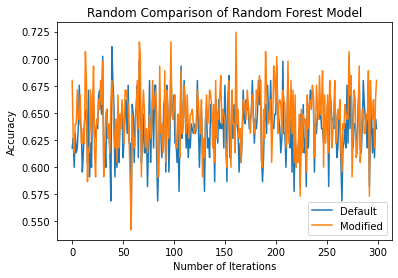

In [46]:
plt.plot(range(300), rdf_default_scores)
plt.plot(range(300), rdf_scores)
plt.title("Random Comparison of Random Forest Model")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.legend(["Default", "Modified"])
plt.show()

In [47]:
print("Average accuracy before justification:", np.mean(rdf_default_scores))
print("Average accuracy after justification:", np.mean(rdf_scores))

Average accuracy before justification: 0.6364888888888889
Average accuracy after justification: 0.6451407407407408


In [52]:
print("Variance of default RDF results:", np.var(rdf_default_scores))
print("Variance of RDF results:", np.var(rdf_scores))
print("Genearlly, the variance becomes slightly larger but accuracy significanly increase", round((np.mean(rdf_scores)-np.mean(rdf_default_scores))*100, 2) , "%.")

Variance of default RDF results: 0.0007320342386831281
Variance of RDF results: 0.0007678443895747602
Genearlly, the variance becomes slightly larger but accuracy significanly increase 0.87 %.


In [53]:
print("My name is Zhicheng Tang")
print("My NetID is: zt17")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhicheng Tang
My NetID is: zt17
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
